## Topic Modeling: Top2Vec and BERTopic

- by Matt Jackson
- Mar. 3, 2024

Note: This document is intended to demonstrate methods/models tested for exploratory data analysis, and does not represent finished work product.

Note: Some of the topic printouts below contain a racial epithet, which is in the corpus due to reports that contained allegations of using racial epithets.


This notebook attempts to use two embedding-based methods for topic modeling, top2vec and BERTopic. Unlike prior methods, these methods automatically determine the appropriate number of topics as they execute, so `num_components` is not set as a parameter.


#### Imports

In [2]:
from top2vec import Top2Vec
import os
import tensorflow_hub as hub
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer
from text_parser import TextParser

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mbjackson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mbjackson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Top2Vec

Sources: 
- https://www.kdnuggets.com/2023/01/topic-modeling-approaches-top2vec-bertopic.html
- https://github.com/ddangelov/Top2Vec 


Get corpus out from file where I saved it

In [ ]:
def corpus_from_corpus_file(filename):
    """Recover a saved corpus from a .txt file"""
    with open(filename) as f:
        corpus = f.readlines()
    return corpus 

corpus = corpus_from_corpus_file("corpora/corpus_raw_03-01-24.txt")
corpus_pp = corpus_from_corpus_file("corpora/corpus_raw_pp_03-01-24.txt")


The usual is to call `embedding_model="universal-sentence-encoder"`, but attempts to use the default commands failed to install it on my machine, so I made use of Tensorflow Hub instead.

In [5]:


# "This module is about 1 GB" - takes about 2.5 min
# https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/tensorFlow2/variations/universal-sentence-encoder/versions/2?tfhub-redirect=true
embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2")

In [25]:
model_f = Top2Vec(corpus, embedding_model=embed, speed="fast-learn") #for now

# ImportError: universal-sentence-encoder-multilingual is not available.

#Try: pip install top2vec[sentence_encoders]
#(results in zsh: no matches found: top2vec[sentence_encoders])

#Alternatively try: pip install tensorflow tensorflow_hub tensorflow_text
#(results in ERROR: Could not find a version that satisfies the requirement tensorflow_text (from versions: none)
#ERROR: No matching distribution found for tensorflow_text)


2024-03-01 23:52:04,133 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-03-01 23:52:15,157 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-01 23:52:34,990 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-01 23:52:39,292 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-01 23:52:39,321 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


Alternately, you can train using `embedding_model="doc2vec"`. This takes substantially longer on CPU, because doc2vec starts from scratch with every execution! So first effort was to get a preexisting model and fine-tune it.

with `universal-sentence-encoder` and speed `"fast-learn"` it takes 37 seconds

In [32]:
#print("RAW CORPUS, SPEED: LEARN")
#model_l = Top2Vec(corpus, embedding_model=embed, speed="learn")
print("PREPROCESSED CORPUS, SPEED: FAST-LEARN")
model_f_pp = Top2Vec(corpus_pp, embedding_model=embed, speed="fast-learn")
print("PREPROCESSED CORPUS, SPEED: LEARN")
model_l_pp = Top2Vec(corpus_pp, embedding_model=embed, speed="learn")

2024-03-01 23:56:26,962 - top2vec - INFO - Pre-processing documents for training


INFO:top2vec:Pre-processing documents for training


PREPROCESSED CORPUS, SPEED: FAST-LEARN


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-03-01 23:56:33,978 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-01 23:56:44,629 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-01 23:56:48,302 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-01 23:56:48,330 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2024-03-01 23:56:48,402 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


PREPROCESSED CORPUS, SPEED: LEARN


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-03-01 23:56:55,506 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-01 23:57:06,059 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-01 23:57:09,695 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-01 23:57:09,722 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


Each of these takes like 30-40 seconds. May as well use `"learn"` instead of `"fast-learn"`

In [26]:
#model.save("top2vec_model_alpha")
#model = Top2Vec.load("top2vec_model_alpha")

print(model_f.get_num_topics())
topic_sizes, topic_nums = model_f.get_topic_sizes()

topic_words, word_scores, topic_nums = model_f.get_topics()

print(topic_words)

4
[['officer' 'officers' 'tasered' 'allegation' 'investigated' 'arresting'
  'tased' 'detainment' 'reprimand' 'informant' 'detaining' 'arrests'
  'cuffed' 'eyewitnesses' 'corroborate' 'policing' 'misconduct' 'cop'
  'resisting' 'testimony' 'investigations' 'cops' 'arrest' 'handcuffing'
  'detained' 'tase' 'exonerate' 'detain' 'handcuffed' 'eyewitness'
  'complying' 'police' 'warrant' 'investigative' 'unjustified'
  'investigation' 'allegations' 'fto' 'deescalate' 'testified'
  'detectives' 'tasers' 'unarmed' 'exonerated' 'alleged' 'pled' 'taser'
  'obstruction' 'apprehended' 'disciplinary']
 ['officer' 'tasered' 'policing' 'deescalate' 'officers' 'cop'
  'investigated' 'police' 'tased' 'tase' 'cops' 'dispatcher' 'unarmed'
  'investigations' 'reprimand' 'tasers' 'unidentified' 'eyewitnesses'
  'investigative' 'eyewitness' 'detaining' 'detainment' 'disorderly'
  'investigation' 'plainclothes' 'patrolling' 'taser' 'informant'
  'incident' 'civil' 'fto' 'witness' 'tackled' 'holstered' 'cus

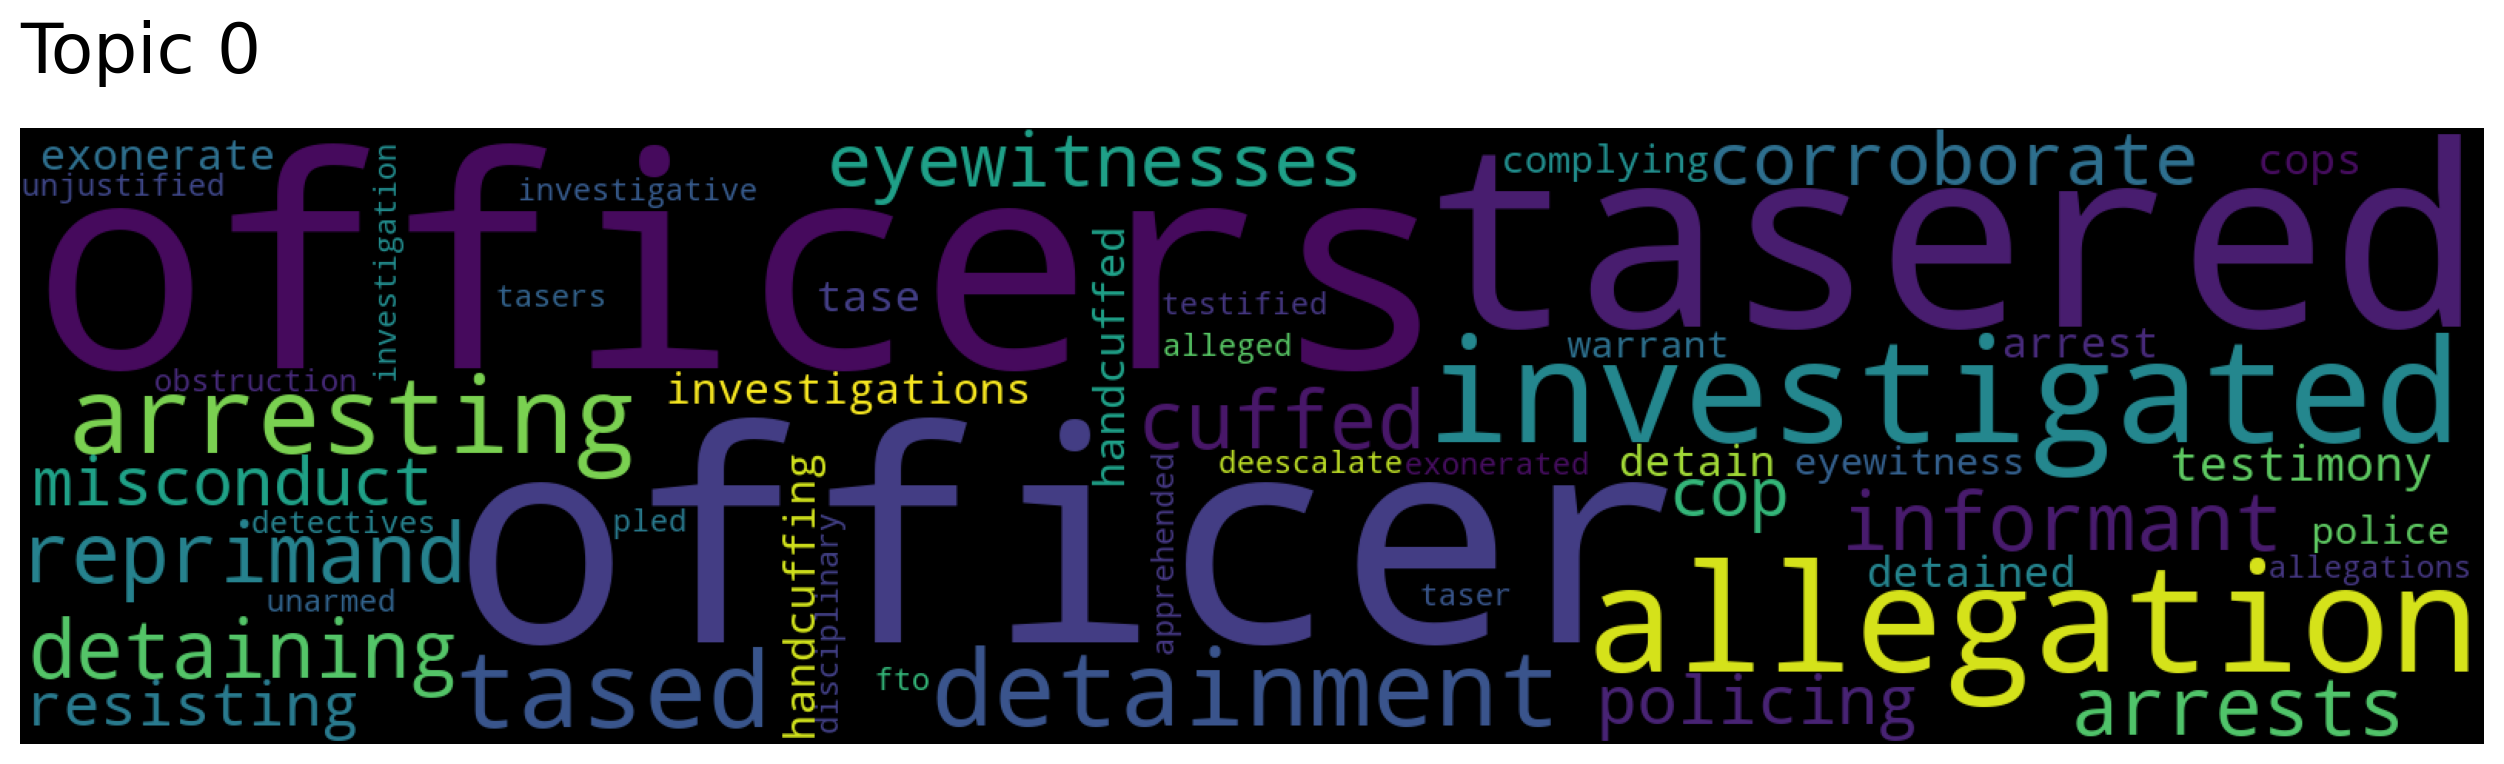

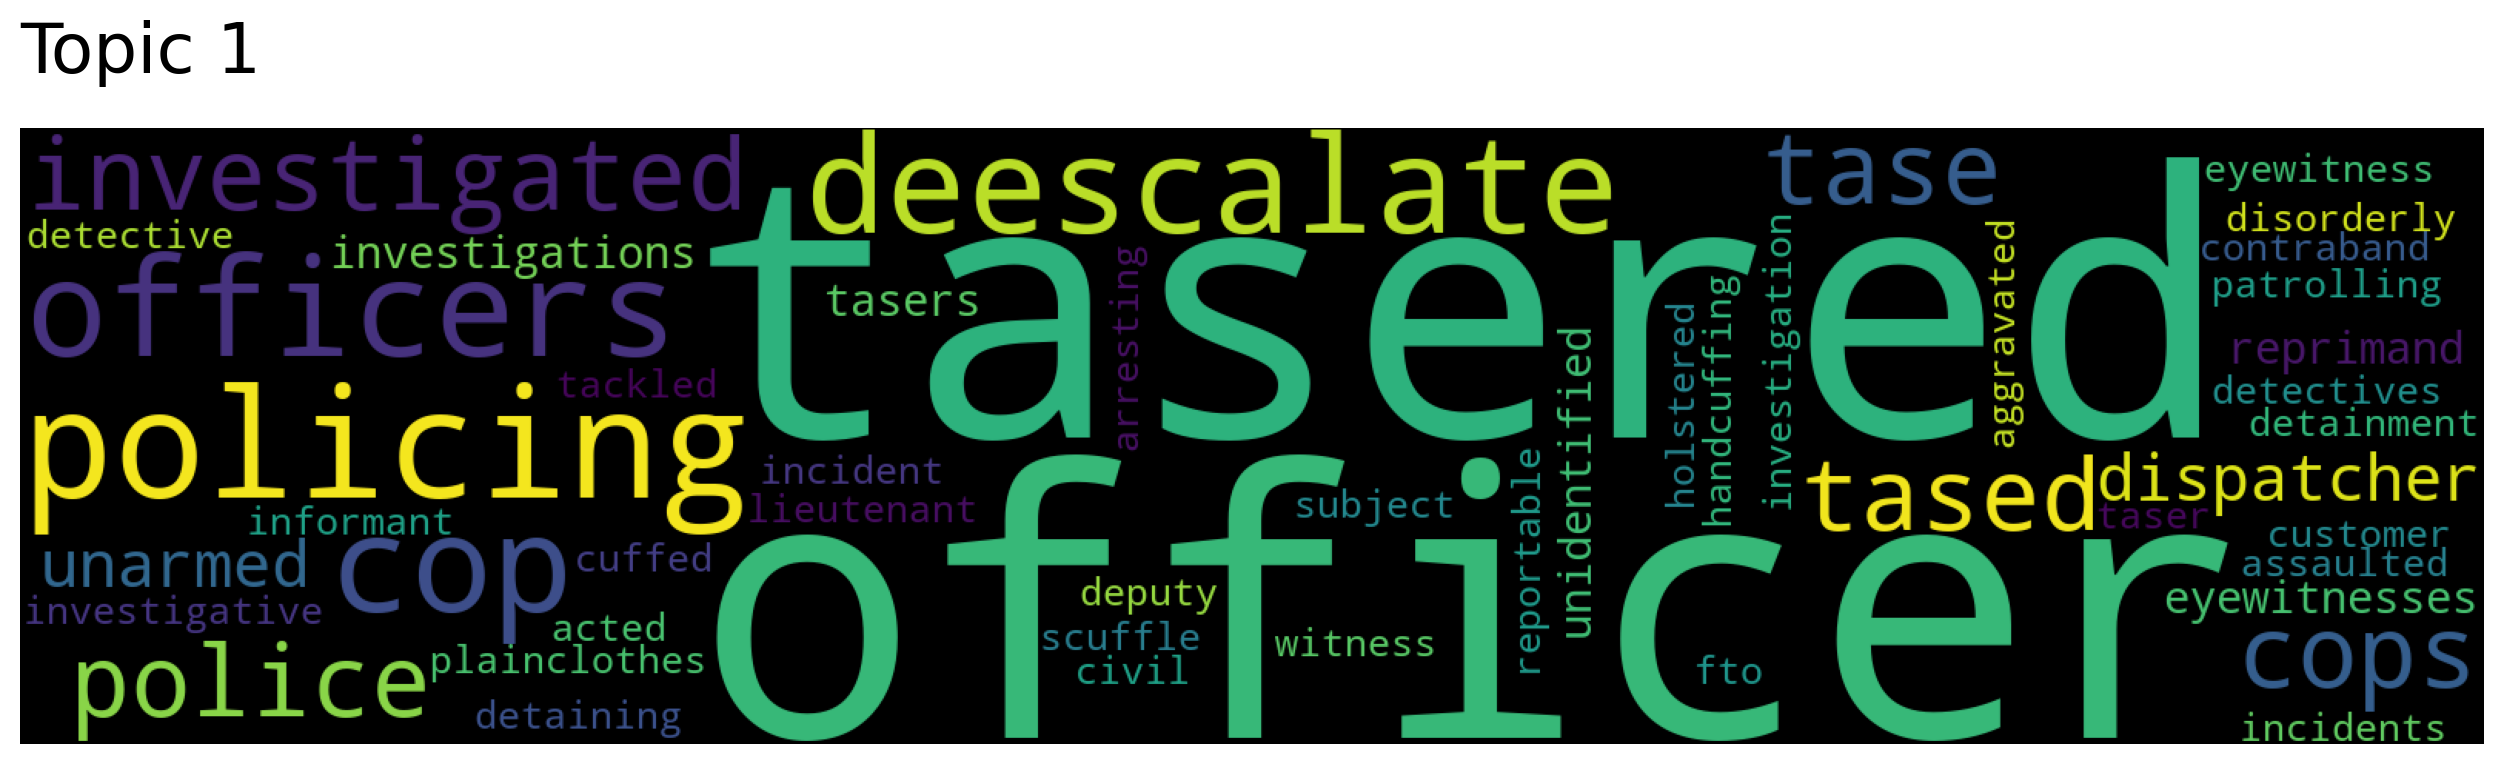

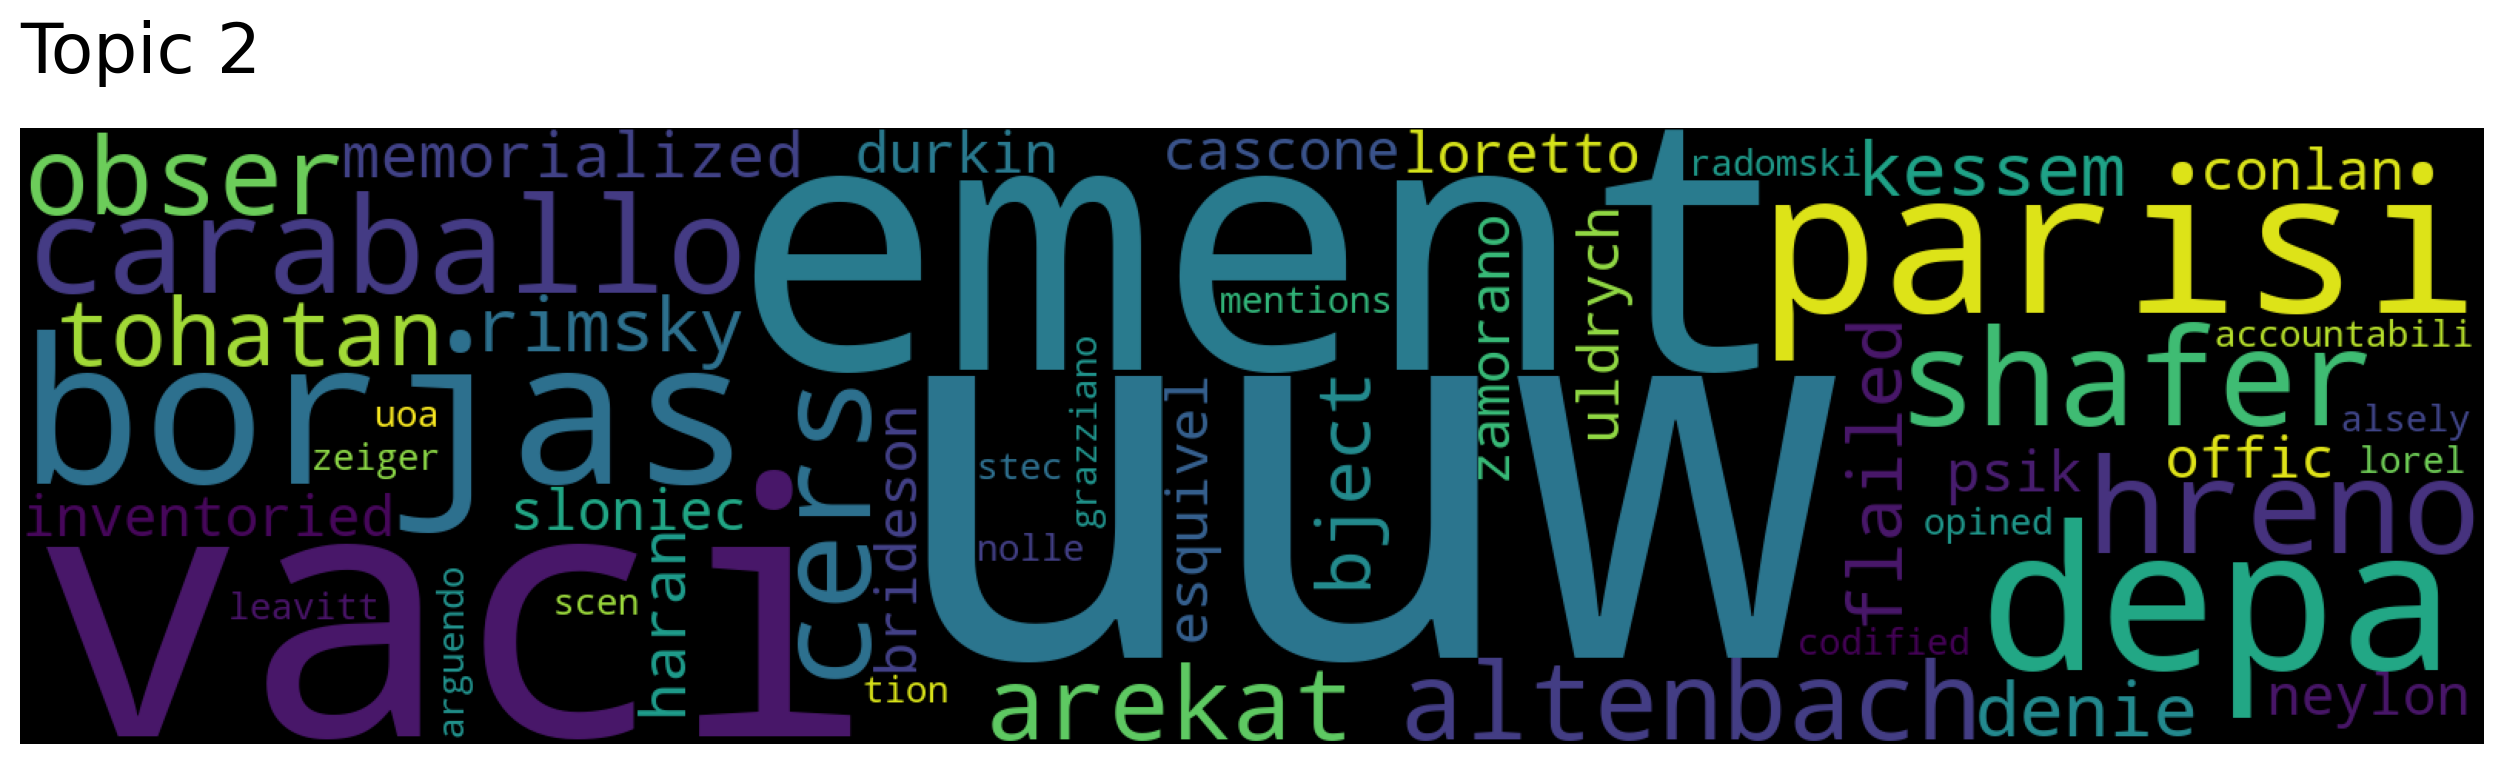

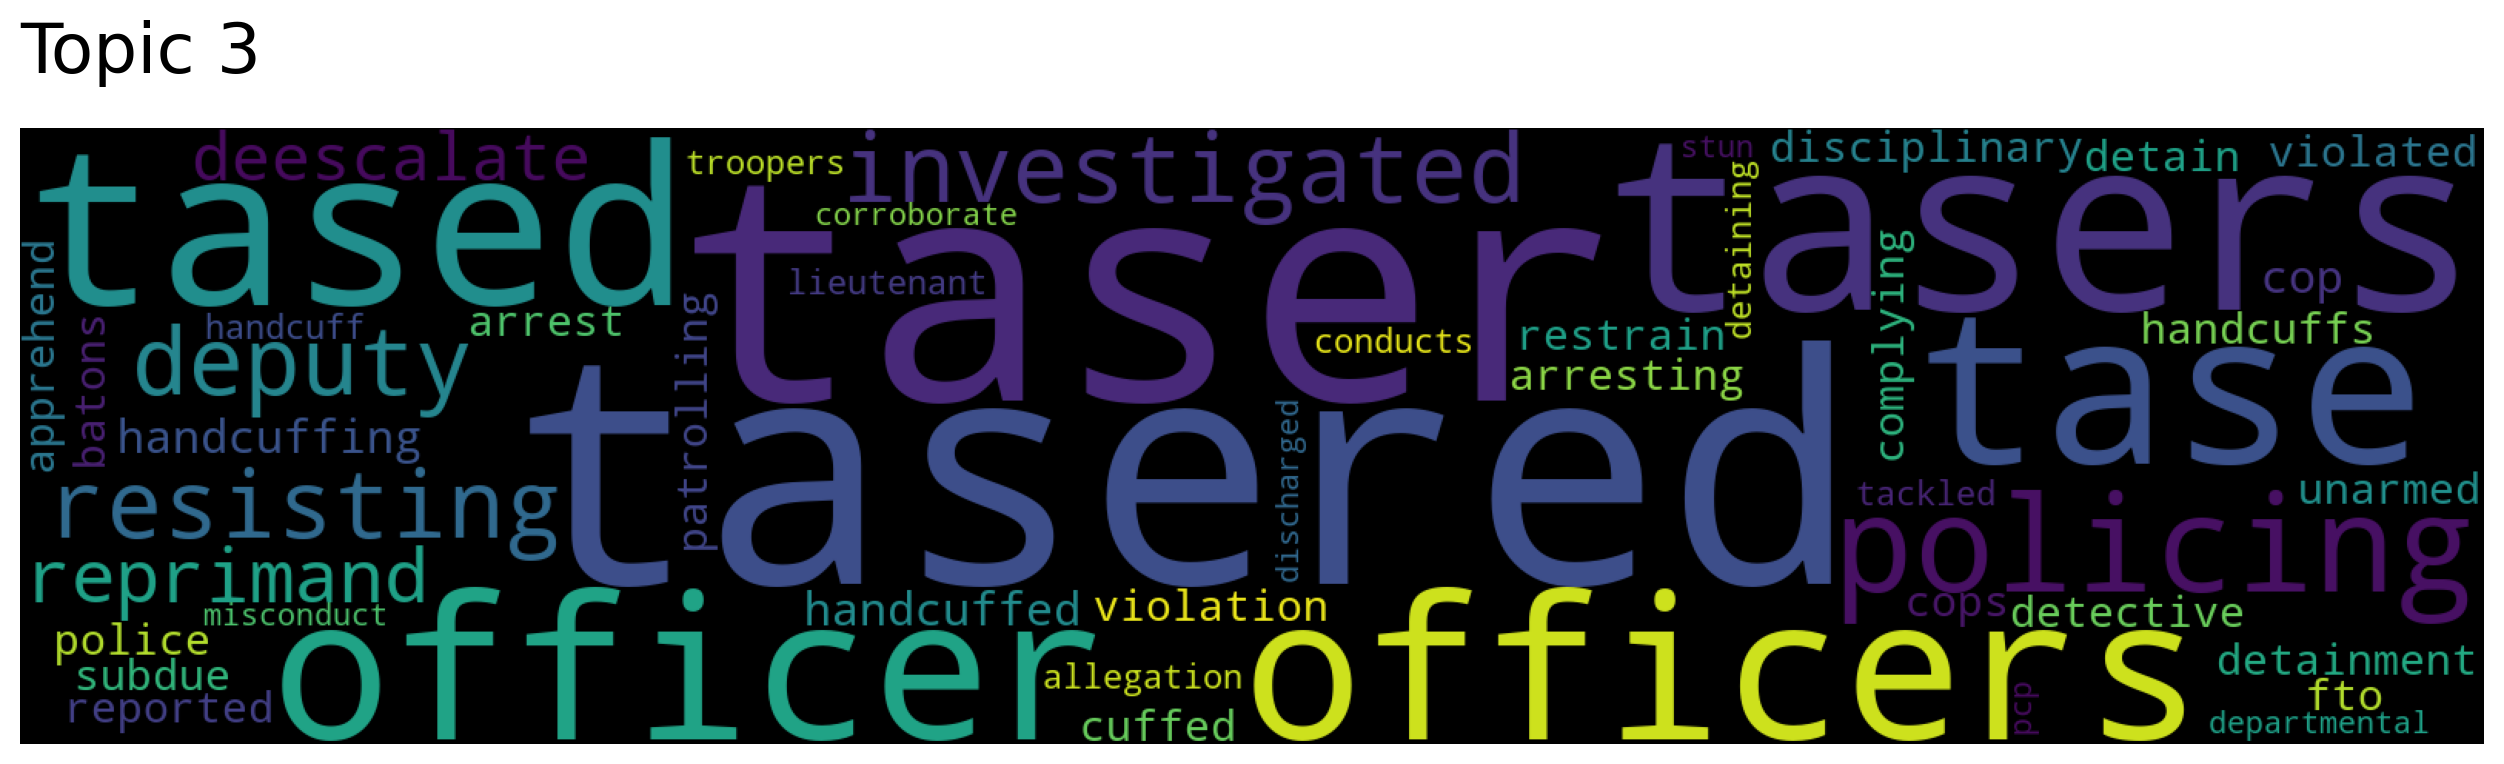

In [29]:
for topic in range(model_f.get_num_topics()):
    model_f.generate_topic_wordcloud(topic)

Unfortunately, these topics, trained on a raw corpus using the built-in `universal-sentence-encoder` model without lemmatization, are very repetitious and full of nonsense words. Not helpful for distinguishing the documents from each other. 

In [30]:
print(model_l.get_num_topics())
topic_sizes, topic_nums = model_l.get_topic_sizes()

topic_words, word_scores, topic_nums = model_l.get_topics()

print(topic_words)

4
[['officer' 'officers' 'tasered' 'allegation' 'investigated' 'arresting'
  'tased' 'detainment' 'reprimand' 'informant' 'detaining' 'arrests'
  'cuffed' 'eyewitnesses' 'corroborate' 'policing' 'misconduct' 'cop'
  'resisting' 'testimony' 'investigations' 'arrest' 'cops' 'handcuffing'
  'detained' 'tase' 'exonerate' 'detain' 'handcuffed' 'eyewitness'
  'complying' 'police' 'warrant' 'investigative' 'unjustified'
  'investigation' 'allegations' 'fto' 'deescalate' 'testified'
  'detectives' 'tasers' 'unarmed' 'exonerated' 'alleged' 'pled' 'taser'
  'obstruction' 'apprehended' 'disciplinary']
 ['officer' 'tasered' 'policing' 'deescalate' 'officers' 'cop'
  'investigated' 'police' 'tased' 'tase' 'cops' 'dispatcher' 'unarmed'
  'investigations' 'reprimand' 'tasers' 'unidentified' 'eyewitnesses'
  'investigative' 'eyewitness' 'detaining' 'detainment' 'disorderly'
  'investigation' 'plainclothes' 'patrolling' 'taser' 'informant'
  'incident' 'civil' 'fto' 'witness' 'tackled' 'holstered' 'cus

Basically the same - only four topics, highly repetitious. Let's try it with a pre-processed model:

In [33]:
print(model_l_pp.get_num_topics())
topic_sizes, topic_nums = model_l_pp.get_topic_sizes()

topic_words, word_scores, topic_nums = model_l_pp.get_topics()

print(topic_words)

2
[['kn' 'thrashers' 'speeding' 'malfunction' 'point' 'bruise' 'yanked'
  'thrasher' 'commotion' 'truth' 'niggers' 'contusion' 'ay' 'points'
  'headlights' 'idiot' 'almost' 'excuse' 'denton' 'headlight' 'bump'
  'plead' 'disprove' 'whi' 'outcry' 'sudden' 'mad' 'said' 'motherfuckers'
  'poi' 'general' 'fail' 'arr' 'memory' 'eberhart' 'cited' 'answering'
  'falsified' 'th' 'mb' 'disobeying' 'bruising' 'deny' 'garner'
  'malicious' 'pl' 'refute' 'flash' 'effort' 'summit']
 ['uuw' 'giiib' 'ement' 'vaci' 'borjas' 'parisi' 'depa' 'accuseds'
  'encarnacions' 'caraballo' 'shafer' 'perezs' 'hreno' 'cers' 'altenbach'
  'obser' 'arekat' 'tohatan' 'rimsky' 'flailed' 'denie' 'kessem' 'bject'
  'incar' 'memorialized' 'haran' 'inventoried' 'esquivel' 'conlan'
  'zamorano' 'neylon' 'psik' 'uldrych' 'offic' 'durkin' 'cascone'
  'sloniec' 'brideson' 'loretto' 'accountabili' 'tion' 'nolle' 'stec'
  'ipras' 'radomski' 'grazziano' 'alsely' 'reentered' 'arguendo'
  'leavitt']]


In [49]:
model_d_pp = Top2Vec(corpus_pp, embedding_model=embed, speed="deep-learn")
print(model_d_pp.get_num_topics())
topic_sizes, topic_nums = model_d_pp.get_topic_sizes()

topic_words, word_scores, topic_nums = model_d_pp.get_topics()
print(topic_words)

2024-03-02 00:19:21,581 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-02 00:19:28,485 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-02 00:19:39,529 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-02 00:19:43,146 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-02 00:19:43,175 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


2
[['kn' 'thrashers' 'speeding' 'malfunction' 'point' 'bruise' 'yanked'
  'thrasher' 'commotion' 'truth' 'niggers' 'contusion' 'ay' 'points'
  'headlights' 'idiot' 'almost' 'excuse' 'denton' 'headlight' 'bump'
  'plead' 'disprove' 'whi' 'outcry' 'sudden' 'mad' 'said' 'motherfuckers'
  'poi' 'general' 'fail' 'arr' 'memory' 'eberhart' 'cited' 'answering'
  'falsified' 'th' 'mb' 'disobeying' 'bruising' 'deny' 'garner'
  'malicious' 'pl' 'refute' 'flash' 'effort' 'summit']
 ['uuw' 'giiib' 'ement' 'vaci' 'borjas' 'parisi' 'depa' 'accuseds'
  'encarnacions' 'caraballo' 'shafer' 'perezs' 'hreno' 'cers' 'altenbach'
  'obser' 'arekat' 'tohatan' 'rimsky' 'flailed' 'denie' 'kessem' 'bject'
  'incar' 'memorialized' 'haran' 'inventoried' 'esquivel' 'conlan'
  'zamorano' 'neylon' 'psik' 'uldrych' 'offic' 'durkin' 'cascone'
  'sloniec' 'brideson' 'loretto' 'accountabili' 'tion' 'nolle' 'stec'
  'ipras' 'radomski' 'grazziano' 'alsely' 'reentered' 'arguendo'
  'leavitt']]


Preprocessing / removing extremely common words makes it worse! The names and unique words go into one topic and almost every other word goes into the other (including racial epithets)!

Is this salvageable? Can I command Top2Vec to create a specific number of topics rather than the automatic number it "wants" to create? Let's create a more curated corpus and see if that helps:

In [3]:
from time import time

t0 = time()
tp = TextParser(path="../../text_files", nlp_task="topic modeling",
                        add_custom_stops=True, findings_are_stops=True, 
                        names_are_stops=True, digraphs_are_stops=True)
corpus = tp.get_full_corpus(
            preprocess_input=True,
            lemmatize_input=True,
            print_progress=True
        )
print(f"Parser and corpus completed in {time() - t0} seconds.")

Initializing parsers for topic modeling...
Extracting text from file 0...
Extracting text from file 100...
Extracting text from file 200...
Extracting text from file 300...
Extracting text from file 400...
Extracting text from file 500...
Extracting text from file 600...
Extracting text from file 700...
Extracting text from file 800...
Extracting text from file 900...
Extracting text from file 1000...
Extracting text from file 1100...
Extracting text from file 1200...
Extracting text from file 1300...
Extracting text from file 1400...
Extracting text from file 1500...
Extracting text from file 1600...
Extracting text from file 1700...
Extracting text from file 1800...
Extracting text from file 1900...
Extracting text from file 2000...
Extracting text from file 2100...
Corpus text extraction complete
Parser and corpus completed in 608.1918239593506 seconds.


In [8]:
model_f = Top2Vec(corpus, embedding_model=embed, speed="fast-learn")

print(model_f.get_num_topics())
topic_sizes, topic_nums = model_f.get_topic_sizes()

topic_words, word_scores, topic_nums = model_f.get_topics()

print(topic_words)


2024-03-03 19:51:41,056 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-03 19:51:46,020 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-03 19:51:54,012 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-03 19:51:57,698 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-03 19:51:57,724 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


2
[['malfunction' 'speeding' 'point' 'bruise' 'commotion' 'truth' 'yanked'
  'idiot' 'contusion' 'headlight' 'disprove' 'excuse' 'thrasher' 'fail'
  'bump' 'falsified' 'plead' 'inattentive' 'mad' 'almost' 'rage' 'deny'
  'refute' 'obvious' 'cited' 'convincing' 'disobeying' 'malicious'
  'bruising' 'impair' 'item' 'whi' 'stitch' 'effort' 'sudden' 'stupid'
  'inconclusive' 'answering' 'cunt' 'told' 'idea' 'interfered' 'punched'
  'outcry' 'groin' 'lupos' 'transpired' 'denies' 'meme' 'lockup']
 ['actually' 'way' 'er' 'arre' 'in' 'le' 'upon' 'one' 'pas' 'dude' 'dis'
  'es' 'no' 'shut' 'est' 'dont' 'got' 'ated' 'posed' 'ment' 'the' 'there'
  'bit' 'eport' 'par' 'inperson' 'quite' 'was' 'alleg' 'stated' 'bro'
  'along' 'reentered' 'ber' 'ked' 'really' 'tive' 'he' 'shit' 'sorry'
  'ont' 'made' 'two' 'po' 'meme' 'as' 're' 'three' 'well' 'came']]


In [ ]:
for topic in range(model_f.get_num_topics()):
    model_f.generate_topic_wordcloud(topic)

That still only produced two topics!

In [11]:

model_l = Top2Vec(corpus, embedding_model=embed, speed="learn")
print(model_l.get_num_topics())
topic_sizes, topic_nums = model_l.get_topic_sizes()

topic_words, word_scores, topic_nums = model_l.get_topics()

print(topic_words)


2024-03-03 19:54:09,564 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-03 19:54:14,479 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-03 19:54:22,444 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-03 19:54:26,060 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-03 19:54:26,086 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


2
[['malfunction' 'speeding' 'point' 'bruise' 'commotion' 'truth' 'yanked'
  'idiot' 'contusion' 'headlight' 'disprove' 'excuse' 'thrasher' 'fail'
  'bump' 'falsified' 'plead' 'inattentive' 'mad' 'almost' 'rage' 'deny'
  'refute' 'obvious' 'cited' 'convincing' 'disobeying' 'malicious'
  'bruising' 'impair' 'item' 'whi' 'stitch' 'effort' 'sudden' 'stupid'
  'inconclusive' 'answering' 'cunt' 'told' 'idea' 'interfered' 'punched'
  'outcry' 'groin' 'lupos' 'transpired' 'denies' 'meme' 'lockup']
 ['actually' 'way' 'er' 'arre' 'in' 'le' 'upon' 'one' 'pas' 'dude' 'dis'
  'es' 'no' 'shut' 'est' 'dont' 'got' 'ated' 'posed' 'ment' 'the' 'there'
  'bit' 'eport' 'par' 'inperson' 'quite' 'was' 'alleg' 'stated' 'bro'
  'along' 'reentered' 'ber' 'ked' 'really' 'tive' 'he' 'shit' 'sorry'
  'ont' 'made' 'two' 'po' 'meme' 'as' 're' 'three' 'well' 'came']]


In [13]:

model_d = Top2Vec(corpus, embedding_model=embed, speed="deep-learn")

2024-03-03 19:54:49,407 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-03 19:54:54,650 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-03 19:55:02,852 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-03 19:55:06,455 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-03 19:55:06,481 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [14]:
print(model_d.get_num_topics())
topic_sizes, topic_nums = model_d.get_topic_sizes()

topic_words, word_scores, topic_nums = model_d.get_topics()

print(topic_words)

2
[['malfunction' 'speeding' 'point' 'bruise' 'commotion' 'truth' 'yanked'
  'idiot' 'contusion' 'headlight' 'disprove' 'excuse' 'thrasher' 'fail'
  'bump' 'falsified' 'plead' 'inattentive' 'mad' 'almost' 'rage' 'deny'
  'refute' 'obvious' 'cited' 'convincing' 'disobeying' 'malicious'
  'bruising' 'impair' 'item' 'whi' 'stitch' 'effort' 'sudden' 'stupid'
  'inconclusive' 'answering' 'cunt' 'told' 'idea' 'interfered' 'punched'
  'outcry' 'groin' 'lupos' 'transpired' 'denies' 'meme' 'lockup']
 ['actually' 'way' 'er' 'arre' 'in' 'le' 'upon' 'one' 'pas' 'dude' 'dis'
  'es' 'no' 'shut' 'est' 'dont' 'got' 'ated' 'posed' 'ment' 'the' 'there'
  'bit' 'eport' 'par' 'inperson' 'quite' 'was' 'alleg' 'stated' 'bro'
  'along' 'reentered' 'ber' 'ked' 'really' 'tive' 'he' 'shit' 'sorry'
  'ont' 'made' 'two' 'po' 'meme' 'as' 're' 'three' 'well' 'came']]


Still only 2 topics! That seems pretty bad. This pre-trained model doesn't seem to be doing the trick. If we really want to train from scratch, let's try the `"doc2vec"` option -- it should be very slow but trains directly to the corpus I actually have...

In [15]:
model_d2v = Top2Vec(corpus, embedding_model="doc2vec", speed="fast-learn")
print(model_d2v.get_num_topics())
topic_sizes, topic_nums = model_d2v.get_topic_sizes()

topic_words, word_scores, topic_nums = model_d2v.get_topics()

print(topic_words)

2024-03-03 19:56:45,467 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-03 19:56:49,812 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-03 19:59:36,778 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-03 19:59:40,400 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-03 19:59:40,429 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


5
[['iilfhu' 'detained' 'insurance' 'searched' 'gathered' 'license'
  'pushed' 'investigatory' 'handcuffed' 'citation' 'sexrace' 'called'
  'stop' 'complainant' 'deyoung' 'handcuff' 'interaction' 'alsely'
  'accused' 'justification' 'impounded' 'ticket' 'fennel' 'pocketknife'
  'probable' 'stopped' 'district' 'tightly' 'succinctly' 'convict'
  'proof' 'accountability' 'verbally' 'grabbed' 'investigation'
  'template' 'traffic' 'areasonable' 'complaint' 'curbed' 'mcmanamon'
  'profiling' 'illegally' 'allegation' 'occurred' 'radelescu'
  'statistical' 'publication' 'crushon' 'female']
 ['ubject' 'shot' 'gunshot' 'fired' 'subj' 'ect' 'lieves' 'firing'
  'handgun' 'fire' 'cer' 'offi' 'semiautomatic' 'shooting' 'roundtable'
  'wound' 'gun' 'infliction' 'great' 'drop' 'caliber' 'defeated' 'weapon'
  'subjec' 'death' 'bject' 'gangway' 'eapon' 'inflict' 'logu' 'itness'
  'bodily' 'es' 'pistol' 'witn' 'revolver' 'canvas' 'harm' 'fearing'
  'bullet' 'pursued' 'escape' 'panel' 'bei' 'fled' 'forci

Better, but still not great. The from-scratch training ends up finding 5 topics, some of which seem semantically meaningful. In particular:

- Topic 1 gathers terms about rough interactions between police and residents, 
- Topic 2 appears to be about handgun-based violence, 
- Topic 3 appears to gather the administrative words, 
- Topic 4 appears to be about unintentional voilence and violence with less standard weapons. 
- Topic 5 seems to be more of a grab bag.

In general, it seems as though getting top2vec to work is difficult. There are a plethora of options to choose from in setting up the model, including selecting a different default embedding model to fine-tune, but there isn't a clearly legible way to set a floor on the number of topics generated. This suggests that, in the time we have, it is a less promising option than the "simpler" vectorizer-based methods tested thus far.

### BERTopic


Sources consulted: https://maartengr.github.io/BERTopic/index.html#quick-start

In [35]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(corpus)

In [38]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,11,-1_the_subject_officer_that,"[the, subject, officer, that, to, and, ppo, of...",[INDEPENDENT POLICE REVIEW AUTHORITY LOG# 105...
1,0,1455,0_the_and_to_of,"[the, and, to, of, officer, that, was, in, he,...",[CIVILIAN OFFICE OF P OLICE ACCOUNTABILITY LO...
2,1,351,1_the_of_and_to,"[the, of, and, to, that, officer, is, in, copa...",[CIVILIAN OFFICE OF POLI CE ACCOUNTABILITY LO...
3,2,212,2_the_subject_and_officer,"[the, subject, and, officer, to, witness, of, ...",[INDEPENDENT POLICE REVIEW AUTHORITY ...
4,3,36,3_the_subject_and_officer,"[the, subject, and, officer, to, of, that, was...",[CIVILIAN OFFICE OF POLICE ACCOUNTABILITY 29 S...
5,4,30,4_nan___,"[nan, , , , , , , , , ]","[nan\n, nan\n, nan\n]"
6,5,26,5_the_to_of_that,"[the, to, of, that, officer, and, in, on, he, or]",[SUMMARY REPORT DIGEST INDEPENDENT POLICE REV...
7,6,15,6_taser_subject_the_to,"[taser, subject, the, to, officer, and, that, ...",[INDEPENDENT POLICE REVIEW AUTHORITY Log # 107...
8,7,12,7_subject_the_officer_and,"[subject, the, officer, and, to, of, his, in, ...",[Independent Police Review Authority ...


When training BERTopic on the unedited corpus, almost all of the topics are useless! Gotta remove stopwords and common words. Notice that the only word that seems to meaningfully distinguish some documents from others among the top words surfaced is `taser`.

In [39]:
topics, probs = topic_model.fit_transform(corpus_pp)
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,600,-1_officer_copa_officers_mr,"[officer, copa, officers, mr, stated, vehicle,...",[ log date incident apri...
1,0,317,0_copa_officer_accountability_poli,"[copa, officer, accountability, poli, ce, offi...",[civilian office poli ce accountability ...
2,1,285,1_subject_officer_witness_weapon,"[subject, officer, witness, weapon, officers, ...",[ log u inves tigation number log u ...
3,2,130,2_subject_officer_complainant_civilian,"[subject, officer, complainant, civilian, stat...",[ log summary incident june approximately ...
4,3,89,3_officer_stop_vehicle_mr,"[officer, stop, vehicle, mr, officers, car, ru...",[ log date incident april ...
5,4,81,4_firearm_officer_att_force,"[firearm, officer, att, force, weapon, copa, f...",[ log u date incident may ...
6,5,62,5_officer_sustained_officers_rule,"[officer, sustained, officers, rule, sgt, stat...",[ log date incident may ...
7,6,60,6_officer_sergeant_mr_search,"[officer, sergeant, mr, search, officers, copa...",[ log date incident november...
8,7,58,7_subject_civilian_involved_officer,"[subject, civilian, involved, officer, xxxx, s...",[ log date incident february ...
9,8,54,8_officer_subject_stated_officers,"[officer, subject, stated, officers, copa, pol...",[civilian offic e police accountability log ...


In [43]:

representation_model = KeyBERTInspired()
topic_model = BERTopic(representation_model=representation_model)
topics, probs = topic_model.fit_transform(corpus_pp)
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,570,-1_officers_officer_arrest_police,"[officers, officer, arrest, police, civilian, ...",[ log date inciden...
1,0,317,0_officers_officer_arrest_police,"[officers, officer, arrest, police, civilian, ...",[civilian office poli ce accountability ...
2,1,286,1_officers_officer_police_civilian,"[officers, officer, police, civilian, incident...",[ log u inves tigation number log u ...
3,2,136,2_arrest_officers_officer_detained,"[arrest, officers, officer, detained, police, ...",[ log date incident decembe...
4,3,131,3_officers_arrest_officer_altercation,"[officers, arrest, officer, altercation, incid...",[ log summary incident june approximately ...
5,4,93,4_officers_officer_arrest_detained,"[officers, officer, arrest, detained, police, ...",[ log date incident april ...
6,5,81,5_officers_officer_firearm_sergeant,"[officers, officer, firearm, sergeant, sgt, po...",[civilian office police ccountability log ...
7,6,61,6_officers_officer_arrest_sergeant,"[officers, officer, arrest, sergeant, police, ...",[ log date incident august ...
8,7,55,7_officers_officer_copa_arrest,"[officers, officer, copa, arrest, sergeant, sg...",[ log date incident january...
9,8,52,8_officers_officer_copa_copas,"[officers, officer, copa, copas, police, cpd, ...",[log page final summary report ...


More topics, but still overloaded with words that appear in far too many topics (`officer(s)`, `incident(s)`, etc.) Again, there appears to be a `taser`- related topic (listed here as topic 23) that stands out.

In BERTopic, one can use a CountVectorizer to detect and remove frequent words after the model is trained. Let's do that:
https://maartengr.github.io/BERTopic/faq.html#how-do-i-remove-stop-words 

In [46]:


ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
topic_model = BERTopic(ctfidf_model=ctfidf_model)
topics, probs = topic_model.fit_transform(corpus_pp)
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,637,-1_mr_ms_copa_attachment,"[mr, ms, copa, attachment, allegation, id, sus...",[ log date incident decembe...
1,0,317,0_poli_accountability_ce_office,"[poli, accountability, ce, office, copa, civil...",[civilian office polic e accountability logu ...
2,1,284,1_witness_subject_fired_weapon,"[witness, subject, fired, weapon, gun, th, hea...",[ log u inves tigation number log u ...
3,2,132,2_complainant_subject_xxxx_civilian,"[complainant, subject, xxxx, civilian, ipra, s...",[ log page introduction april officer inv...
4,3,88,3_felters_stop_mr_car,"[felters, stop, mr, car, farias, skalski, exon...",[ log date incident april ...
5,4,79,4_firearm_discharge_discharged_sanchez,"[firearm, discharge, discharged, sanchez, fire...",[ log date incident july t...
6,5,63,5_leticia_skip_bednarek_rule,"[leticia, skip, bednarek, rule, sgt, violation...",[ log date incident time incident loca...
7,6,62,6_xxxx_xxx_civilian_subject,"[xxxx, xxx, civilian, subject, involved, serge...",[civillian office police accountability log...
8,7,56,7_mcdonald_guevara_att_pg,"[mcdonald, guevara, att, pg, discharge, append...",[ log date incident time incident loca...
9,8,44,8_murray_morrison_conway_gonzalez,"[murray, morrison, conway, gonzalez, store, bi...",[ log date incident june ...


This is noticeably better, albeit still highly repetitous loaded up with specific names. We can try a fancier built-in visualization now to see the intertopic distance in a 2-dimensional reduction of model space:

In [47]:
topic_model.visualize_topics()

As expected from the overlap in topic words, it seems that there is substantial overlap in (at least the 2-dimensional reduction of) topic space; what seems like over 20 topics is actually concentrated in about 6 areas. This suggests that further tuning or better setup could isolate a better set of fewer topics.

LDA assigned each document a probability of being under a particular topic; BERTopic labels are categorical, meaning that each document is ascribed exactly one topic (with -1 being the dummy topic for outlier words that don't fit). Let's see what it turns up when doing this:

In [48]:
topic_model.get_document_info(corpus_pp)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,log date incident october ...,-1,-1_mr_ms_copa_attachment,"[mr, ms, copa, attachment, allegation, id, sus...",[ log date incident decembe...,mr - ms - copa - attachment - allegation - id ...,0.000000,False
1,log date incident january...,21,21_schaaf_lt_cuenca_perez,"[schaaf, lt, cuenca, perez, fernandez, kereake...",[ log date incident novemb...,schaaf - lt - cuenca - perez - fernandez - ker...,0.990481,False
2,civilian office police accountabili ty log ...,-1,-1_mr_ms_copa_attachment,"[mr, ms, copa, attachment, allegation, id, sus...",[ log date incident decembe...,mr - ms - copa - attachment - allegation - id ...,0.000000,False
3,log datetimelocation incident march ...,20,20_warrant_aporongao_search_doe,"[warrant, aporongao, search, doe, wolinski, ap...",[ log date incident decembe...,warrant - aporongao - search - doe - wolinski ...,1.000000,False
4,civilian office poli ce accountability log ...,0,0_poli_accountability_ce_office,"[poli, accountability, ce, office, copa, civil...",[civilian office polic e accountability logu ...,poli - accountability - ce - office - copa - c...,1.000000,False
...,...,...,...,...,...,...,...,...
2143,log page final summary report ...,7,7_mcdonald_guevara_att_pg,"[mcdonald, guevara, att, pg, discharge, append...",[ log date incident time incident loca...,mcdonald - guevara - att - pg - discharge - ap...,0.514038,False
2144,log u investigation number log u involve...,1,1_witness_subject_fired_weapon,"[witness, subject, fired, weapon, gun, th, hea...",[ log u inves tigation number log u ...,witness - subject - fired - weapon - gun - th ...,1.000000,False
2145,log summary incident august approximately ...,4,4_firearm_discharge_discharged_sanchez,"[firearm, discharge, discharged, sanchez, fire...",[ log date incident july t...,firearm - discharge - discharged - sanchez - f...,0.372226,False
2146,civilian office police accountabili ty log ...,-1,-1_mr_ms_copa_attachment,"[mr, ms, copa, attachment, allegation, id, sus...",[ log date incident decembe...,mr - ms - copa - attachment - allegation - id ...,0.000000,False


While the model is bogged down with a lot of named entities and excessively common words, it does at least seem to assign topics to documents with the relevant named entities in them, and to assign some non-name words such as `firearm` properly.



As it happens, you're not supposed to preprocess the data when using BERTopic, as the model learns from all data provided (source: https://maartengr.github.io/BERTopic/faq.html#should-i-preprocess-the-data ). But the results we've gotten are substandard enough that it's worth seeing what happens if we try again with a corpus that has a much larger number of custom stopwords (including 2-letter words, personal and street names) removed:

In [24]:
topics, probs = topic_model.fit_transform(corpus)
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,2118,0_vehicle_stated_police_report,"[vehicle, stated, police, report, att, allegat...",[civilian office police accountabili location ...
1,1,30,1____,"[, , , , , , , , , ]","[, , ]"


In [18]:
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
topic_model = BERTopic(ctfidf_model=ctfidf_model)
topics, probs = topic_model.fit_transform(corpus)
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,2118,0_vehicle_stated_police_report,"[vehicle, stated, police, report, att, allegat...",[introduction issue report sustaining certain ...
1,1,30,1____,"[, , , , , , , , , ]","[, , ]"


Oh no -- only two topics! And one of them is empty! What happened here? 

It seems that after the names and "frequent words" are removed, documents are still left with so many similarities that BERTopic is unable to distinguish any meaningful topics, leaving only one "real" topic and one dummy topic with no words in it. 

#### UMAP and HDBSCAN

The recommended next steps in the BERTopic pipeline, UMAP reduces the dimension of the corpus and HDBSCAN creates low-dimensional clusters. Maybe those would result in a different outcome.

In [19]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=10, metric='cosine', low_memory=False)
topic_model = BERTopic(umap_model=umap_model).fit(corpus)

In [20]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,2118,0_vehicle_stated_police_report,"[vehicle, stated, police, report, att, allegat...",[civilian office police accountabili location ...
1,1,30,1____,"[, , , , , , , , , ]","[, , ]"


In [21]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', prediction_data=True)
topic_model = BERTopic(hdbscan_model=hdbscan_model).fit(corpus)

In [22]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,2118,0_vehicle_stated_police_report,"[vehicle, stated, police, report, att, allegat...",[civilian office police accountabili location ...
1,1,30,1____,"[, , , , , , , , , ]","[, , ]"


These do not seem to alleviate the issue or split out the mega-topic into smaller topics.

The "Tips and Tricks" section of documentation (https://maartengr.github.io/BERTopic/getting_started/tips_and_tricks/tips_and_tricks.html) suggest the issue is the following: 

- _"As a default, we are using sentence-transformers to embed our documents. However, as the name implies, the embedding model works best for either sentences or paragraphs. **This means that whenever you have a set of documents, where each documents contains several paragraphs, the document is truncated and the topic model is only trained on a small part of the data.**_

- "_One way to solve this issue is by splitting up longer documents into either sentences or paragraphs before embedding them_"

(emphasis added)

This suggests that BERTopic is not a suitable tool for the text corpus we have, which consists of text extracted from multi-page PDF documents. To make viable use of BERTopic, we'd need to construct a very different text extraction pipeline which turned each sentence or paragraph into a separate "document," and then hope that the results are coherent enough to properly associate related words to topics. In order to do _that_, we'd have to contend with issues like mid-document tables, PDF line breaks, and non-sentence-ending punctuation for terms such as "Lt." and "Sgt." The time we have left is not sufficient to meet this re-pre-processing challenge.

As a result, it makes most sense to leave behind BERTopic (and Top2Vec) and focus on the "simpler" vectorizer-based models (such as LDA, NMF, and K-means) that can produce good results if hyperparameters are well-tuned.